In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
conn = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "Angel*1153",
    database = "fusionproject"
)

In [2]:
query = "SELECT * FROM healthcare_patient"
df = pd.read_sql(query,conn)
df.head()

C:\Users\Anjali\AppData\Local\Temp\ipykernel_15544\349602290.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,conn)


,patient_id,age,gender,hospital,department,diagnosis,length_of_stay_days,treatment_cost,insurance_type,admission_type,discharge_status,admission_year
0,1,51,Male,Apollo Center,Neurology,Diabetes,14,17812,None,Emergency,Recovered,2024
1,2,14,Female,LifeCare Hospital,Neurology,Diabetes,14,56527,Private,Emergency,Recovered,2025
2,3,71,Male,City Hospital,Pediatrics,Fracture,2,33112,Private,Planned,Recovered,2021
3,4,60,Male,Apollo Center,Pediatrics,Heart Disease,9,178933,Government,Planned,Improved,2022
4,5,20,Male,General Hospital,Neurology,Fracture,9,208705,Government,Emergency,Recovered,2025


In [3]:
df.shape

(50000, 12)

In [4]:
df.dtypes

patient_id              int64
age                     int64
gender                 object
hospital               object
department             object
diagnosis              object
length_of_stay_days     int64
treatment_cost          int64
insurance_type         object
admission_type         object
discharge_status       object
admission_year          int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   patient_id           50000 non-null  int64 
 1   age                  50000 non-null  int64 
 2   gender               50000 non-null  object
 3   hospital             50000 non-null  object
 4   department           50000 non-null  object
 5   diagnosis            50000 non-null  object
 6   length_of_stay_days  50000 non-null  int64 
 7   treatment_cost       50000 non-null  int64 
 8   insurance_type       50000 non-null  object
 9   admission_type       50000 non-null  object
 10  discharge_status     50000 non-null  object
 11  admission_year       50000 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.6+ MB


In [6]:
df.describe()

,patient_id,age,length_of_stay_days,treatment_cost,admission_year
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,25000.500000,44.46166,10.002300,252453.745060,2023.004280
std,14433.901067,26.01641,5.476212,142942.289153,1.418613
min,1.000000,0.00000,1.000000,5005.000000,2021.000000
25%,12500.750000,22.00000,5.000000,128499.500000,2022.000000
50%,25000.500000,45.00000,10.000000,251976.000000,2023.000000
75%,37500.250000,67.00000,15.000000,376144.500000,2024.000000
max,50000.000000,89.00000,19.000000,499994.000000,2025.000000


In [7]:
df.columns

Index(['patient_id', 'age', 'gender', 'hospital', 'department', 'diagnosis',
       'length_of_stay_days', 'treatment_cost', 'insurance_type',
       'admission_type', 'discharge_status', 'admission_year'],
      dtype='object')

In [8]:
df.isnull().sum()

patient_id             0
age                    0
gender                 0
hospital               0
department             0
diagnosis              0
length_of_stay_days    0
treatment_cost         0
insurance_type         0
admission_type         0
discharge_status       0
admission_year         0
dtype: int64

- No Null values are present in the dataset

In [9]:
df.duplicated().sum()

np.int64(0)

- No any duplicate values are there

<Axes: >

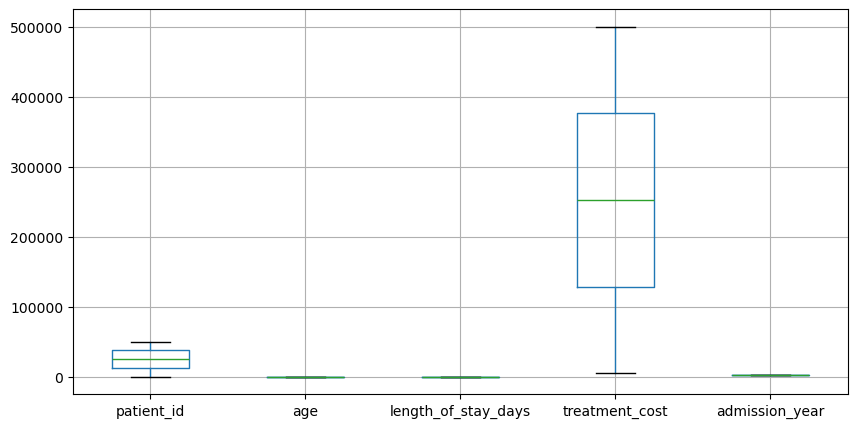

In [10]:
plt.figure(figsize = (10,5))
df.boxplot()

- Plotting the box plot for all numerical column to check whether ouliers are there or not
- There is no any outlier in dataset

# Feature engineering

In [11]:
# Most common diagnose

df['diagnosis'].value_counts()

diagnosis
Hypertension     8473
Cancer           8410
Fracture         8305
Asthma           8277
Heart Disease    8269
Diabetes         8266
Name: count, dtype: int64

- Most common diagnosis is hypertension

In [12]:
# Which department recieves the most emergency cases

emergency_cases = df[df['admission_type'] == 'Emergency']

emergency_by_dept = emergency_cases['department'].value_counts()
emergency_by_dept

department
Cardiology          2826
Oncology            2801
Orthopedics         2800
Neurology           2775
General Medicine    2743
Pediatrics          2734
Name: count, dtype: int64

- Cardiology department receives the most emergency cases

In [13]:
# Average treatment cost by department

df.groupby('department')[['treatment_cost']].mean()

,treatment_cost
department,
Cardiology,252196.767428
General Medicine,251585.353464
Neurology,253822.730044
Oncology,252203.938346
Orthopedics,251684.045662
Pediatrics,253214.552866


- Few thousands difference is there between average treatement cost of each department

In [15]:
# Length of stay vs treatment cost
df[['length_of_stay_days', 'treatment_cost']].corr()

,length_of_stay_days,treatment_cost
length_of_stay_days,1.000000,-0.003121
treatment_cost,-0.003121,1.000000


- Negative correlation is there between legth of stay and cost of treatment means weak relation/no relation is there between this two columns

In [16]:
# Average cost by admission type
df.groupby('admission_type')[['treatment_cost']].mean()

,treatment_cost
admission_type,
Emergency,251858.317405
Planned,254662.949600
Referral,250879.799442


- Few thousand difference is there in average cost of treatment of each admission type

In [17]:
# Which department has the longest average stay?
df.groupby('department')[['length_of_stay_days']].count()

,length_of_stay_days
department,
Cardiology,8320
General Medicine,8329
Neurology,8431
Oncology,8272
Orthopedics,8344
Pediatrics,8304


- Not much difference but still Cardiology department have hte longest average of stay days

In [18]:
# Which age group has the highest number of admissions?

def age_group(age):
    if age == 0:
        return "Not borned"
    elif age <= 18:
        return "Child"
    elif age <= 50:
        return "Adult"
    else:
        return "Senior Citizen"

In [19]:
df['age_group'] = df['age'].apply(age_group)

- Creating new column by applying feature engineering on the age column

In [20]:
df.head()

,patient_id,age,gender,hospital,department,diagnosis,length_of_stay_days,treatment_cost,insurance_type,admission_type,discharge_status,admission_year,age_group
0,1,51,Male,Apollo Center,Neurology,Diabetes,14,17812,None,Emergency,Recovered,2024,Senior Citizen
1,2,14,Female,LifeCare Hospital,Neurology,Diabetes,14,56527,Private,Emergency,Recovered,2025,Child
2,3,71,Male,City Hospital,Pediatrics,Fracture,2,33112,Private,Planned,Recovered,2021,Senior Citizen
3,4,60,Male,Apollo Center,Pediatrics,Heart Disease,9,178933,Government,Planned,Improved,2022,Senior Citizen
4,5,20,Male,General Hospital,Neurology,Fracture,9,208705,Government,Emergency,Recovered,2025,Adult


In [21]:
df.groupby('age_group')[['patient_id']].count()

,patient_id
age_group,
Adult,17613
Child,10157
Not borned,535
Senior Citizen,21695


- Adult age group  has the highest number of admissions

In [22]:
# Create cost category feature

def cost_cat(cost):
     if cost <= 50000:
         return "Low"
     elif cost <= 100000:
         return "Medium"
     else:
         return "High"

In [23]:
df['cost_category'] = df['treatment_cost'].apply(cost_cat)
df.head()

,patient_id,age,gender,hospital,department,diagnosis,length_of_stay_days,treatment_cost,insurance_type,admission_type,discharge_status,admission_year,age_group,cost_category
0,1,51,Male,Apollo Center,Neurology,Diabetes,14,17812,None,Emergency,Recovered,2024,Senior Citizen,Low
1,2,14,Female,LifeCare Hospital,Neurology,Diabetes,14,56527,Private,Emergency,Recovered,2025,Child,Medium
2,3,71,Male,City Hospital,Pediatrics,Fracture,2,33112,Private,Planned,Recovered,2021,Senior Citizen,Low
3,4,60,Male,Apollo Center,Pediatrics,Heart Disease,9,178933,Government,Planned,Improved,2022,Senior Citizen,High
4,5,20,Male,General Hospital,Neurology,Fracture,9,208705,Government,Emergency,Recovered,2025,Adult,High


In [24]:
df['cost_category'].value_counts()

cost_category
High      40442
Medium     5070
Low        4488
Name: count, dtype: int64

- Most of the patients pay high cost of treatment for there diagnosis

In [25]:
# Create stay type (Short / Long stay)

df['stay_type'] = df['length_of_stay_days'].apply(lambda x:'Short stay' if x <= 5 else 'Long stay')
df.head()

,patient_id,age,gender,hospital,department,diagnosis,length_of_stay_days,treatment_cost,insurance_type,admission_type,discharge_status,admission_year,age_group,cost_category,stay_type
0,1,51,Male,Apollo Center,Neurology,Diabetes,14,17812,None,Emergency,Recovered,2024,Senior Citizen,Low,Long stay
1,2,14,Female,LifeCare Hospital,Neurology,Diabetes,14,56527,Private,Emergency,Recovered,2025,Child,Medium,Long stay
2,3,71,Male,City Hospital,Pediatrics,Fracture,2,33112,Private,Planned,Recovered,2021,Senior Citizen,Low,Short stay
3,4,60,Male,Apollo Center,Pediatrics,Heart Disease,9,178933,Government,Planned,Improved,2022,Senior Citizen,High,Long stay
4,5,20,Male,General Hospital,Neurology,Fracture,9,208705,Government,Emergency,Recovered,2025,Adult,High,Long stay


In [26]:
df['stay_type'].value_counts()

stay_type
Long stay     36850
Short stay    13150
Name: count, dtype: int64

- Most patients are stay  long days

In [32]:
# Which department generates highest revenue

df.groupby('department')['treatment_cost'].sum().sort_values(ascending=False)

department
Neurology           2139979437
Pediatrics          2102693647
Orthopedics         2100051677
Cardiology          2098277105
General Medicine    2095454409
Oncology            2086230978
Name: treatment_cost, dtype: int64

- Neurology department generates the highest revenue

In [29]:
# Recovery status percentage
status_counts = df['discharge_status'].value_counts()
status_percentage = (status_counts / len(df)) * 100

status_percentage

discharge_status
Recovered    75.186
Improved     17.930
Referred      4.958
Deceased      1.926
Name: count, dtype: float64

- 75% patients are recovered

In [30]:
# Which diagnosis has the longest average stay?

df.groupby('diagnosis')['length_of_stay_days'].mean().sort_values(ascending=False)

diagnosis
Hypertension     10.047917
Fracture         10.027213
Asthma           10.017518
Heart Disease    10.012577
Diabetes          9.978345
Cancer            9.930202
Name: length_of_stay_days, dtype: float64

- Hypertension diagnosis type has the longest average stay

In [33]:
# which age group has highest treatment cost

df.groupby('age_group')['treatment_cost'].sum().sort_values(ascending=False).head(1)

age_group
Senior Citizen    5469518085
Name: treatment_cost, dtype: int64

- Senior citizen has the highest cost of treatment

In [34]:
# What is the year-wise trend of patient admissions?

df['admission_year'].value_counts().sort_index()

admission_year
2021    10063
2022     9912
2023     9876
2024    10046
2025    10103
Name: count, dtype: int64

- There is no any specific relation between the admission year and number of admissions

In [35]:
#Which insurance type covers the highest average cost?

df.groupby('insurance_type')['treatment_cost'].mean().sort_values(ascending=False)

insurance_type
None          254138.080042
Private       252454.642637
Government    251712.275763
Name: treatment_cost, dtype: float64

- None insurance type covers the highest average of treatment cost

# Visualization how data distribute

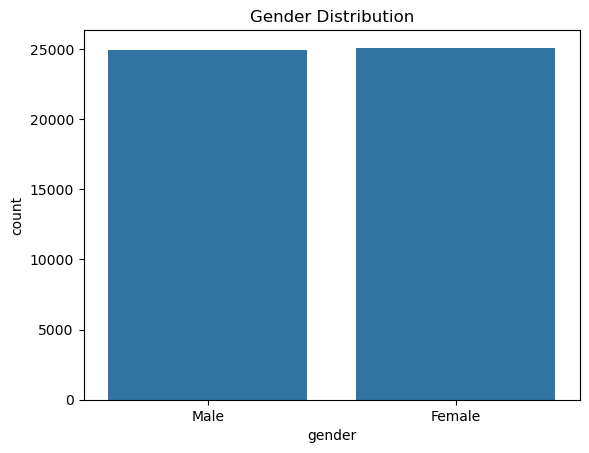

In [41]:
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

- Not much difference is there between male and female patients

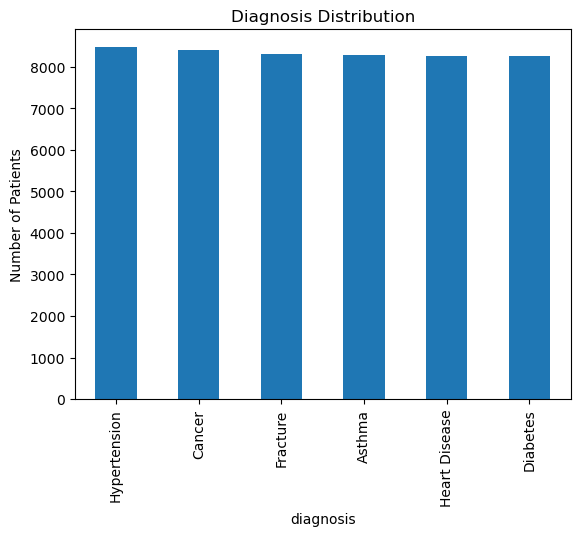

In [42]:
df['diagnosis'].value_counts().plot(kind='bar')
plt.title("Diagnosis Distribution")
plt.ylabel("Number of Patients")
plt.show()

- Hypertension slightly greater than all diagnosis types

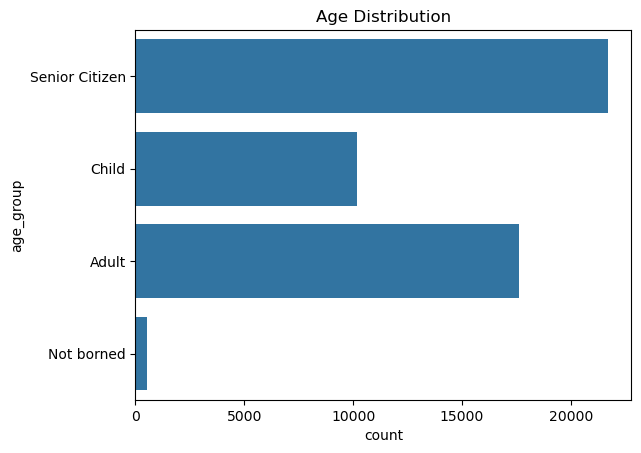

In [45]:
sns.countplot(df['age_group'])
plt.title("Age Distribution")
plt.show()

- Senior citizen patients are more

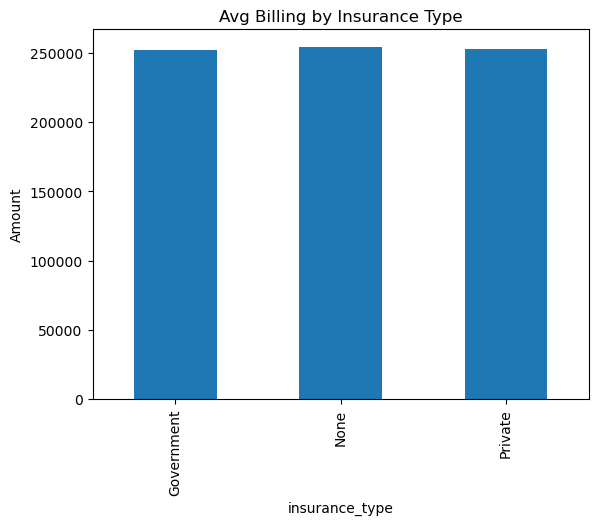

In [47]:
df.groupby('insurance_type')['treatment_cost'].mean().plot(kind='bar')
plt.title("Avg Billing by Insurance Type")
plt.ylabel("Amount")
plt.show()

- Not much difference in average treatment cost by insurance type

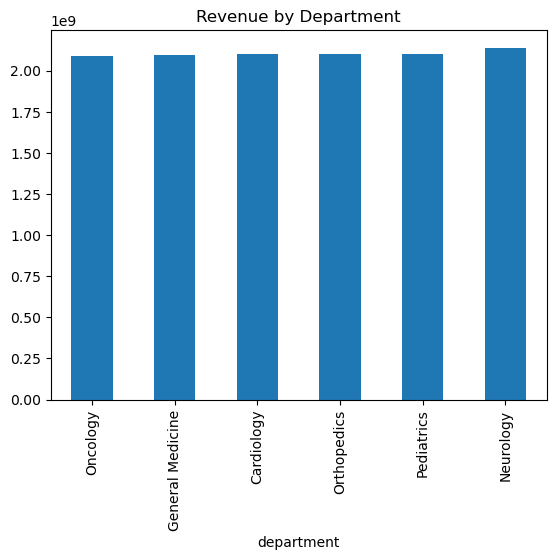

In [51]:
df.groupby('department')['treatment_cost'].sum().sort_values().plot(kind='bar')
plt.title("Revenue by Department")
plt.show()

- Neurology department slightly have high revenue by other departments

In [53]:
df.to_csv("final_healthcare_data.csv", index=False)

- Saving the clean dataset